## IPL Predictions (Sports Analysis)

This dataset contains the results of every Cricket match in IPL since 2008 till 2020. \
The data is publicly available in Kaggle \
https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020

We will try to gain insights from the data and we shall try to predict the first innings score

In [259]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pickle
import warnings

pd.get_option("display.max_columns")
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette("mako", as_cmap=True)
%matplotlib inline

In [119]:
# Load the data
ball_data = pd.read_csv('./data/IPL Ball-by-Ball 2008-2020.csv')
match_data = pd.read_csv('./data/IPL Matches 2008-2020.csv')

In [120]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [121]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [122]:
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [123]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

#### Data Cleanup

The dataset contains a lot of missing data and will not be of much use. We shall drop these columns

In [124]:
print("Dismissal Type: ", ball_data.dismissal_kind.unique())
print("Extras Type: ", ball_data.extras_type.unique())

Dismissal Type:  [nan 'caught' 'run out' 'bowled' 'lbw' 'retired hurt' 'stumped'
 'caught and bowled' 'hit wicket' 'obstructing the field']
Extras Type:  [nan 'byes' 'wides' 'legbyes' 'noballs' 'penalty']


In [125]:
print("Method: ", match_data.method.unique())

Method:  [nan 'D/L']


In [126]:
remove_cols = ['dismissal_kind', 'extras_type']
ball_data.drop(labels=remove_cols, axis=1, inplace=True)
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  player_dismissed  9495 non-null    object
 13  fielder           6784 non-null    object
 14  batting_team      193468 non-null  object
 15  bowling_team      193277 non-null  object
dtypes: int64(9), object(7)
memory usage: 2

In [127]:
match_data.drop(labels='method', axis=1, inplace=True)
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  umpire1          816 non-null    object 
 15  umpire2          816 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 102.1+ KB


In [128]:
print(ball_data.shape)
print(match_data.shape)

(193468, 16)
(816, 16)


In [129]:
merged_data = pd.merge(left=match_data, right=ball_data, left_on='id', right_on='id')
print(merged_data.shape)

merged_data.head()

(193468, 31)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,player_dismissed,fielder,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,AA Noffke,1,0,1,0,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,AA Noffke,1,0,1,0,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,Z Khan,0,0,0,0,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,Z Khan,1,0,1,0,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,Z Khan,1,0,1,0,0,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [130]:
def check_missing_val(df):
    for i in range(df.shape[1]):
        col_name = df.columns[i]
        nan_value = df[col_name].isna().sum().sum()
        if nan_value > 0:
            print(f"{col_name} has {nan_value} NaN values \n")

check_missing_val(merged_data)

city has 3139 NaN values 

player_of_match has 372 NaN values 

winner has 372 NaN values 

result has 372 NaN values 

result_margin has 3597 NaN values 

eliminator has 372 NaN values 

player_dismissed has 183973 NaN values 

fielder has 186684 NaN values 

bowling_team has 191 NaN values 



In [131]:
remove_cols = ['player_dismissed', 'fielder']
merged_data.drop(labels=remove_cols, axis=1, inplace=True)
merged_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


In [132]:
print(merged_data.batting_team.unique())
selected_teams = ['Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Kings XI Punjab',
             'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Daredevils',
             'Mumbai Indians', 'Deccan Chargers', 'Pune Warriors',
             'Sunrisers Hyderabad']

['Kolkata Knight Riders' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


In [133]:
# Remove the teams which are not selected
merged_data = merged_data[(merged_data['batting_team'].isin(selected_teams)) & (merged_data['bowling_team'].isin(selected_teams))]
print("Selected Batting Teams: \n", merged_data.batting_team.unique())
print("Selected Bowling Teams: \n", merged_data.bowling_team.unique())

Selected Batting Teams: 
 ['Kolkata Knight Riders' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Deccan Chargers' 'Pune Warriors' 'Sunrisers Hyderabad']
Selected Bowling Teams: 
 ['Royal Challengers Bangalore' 'Kolkata Knight Riders'
 'Chennai Super Kings' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Deccan Chargers' 'Pune Warriors'
 'Sunrisers Hyderabad']


In [135]:
check_missing_val(merged_data)

city has 3139 NaN values 

player_of_match has 181 NaN values 

winner has 181 NaN values 

result has 181 NaN values 

result_margin has 2659 NaN values 

eliminator has 181 NaN values 



In [136]:
remove_cols = ['city', 'result_margin']
merged_data.drop(labels=remove_cols, axis=1, inplace=True)
check_missing_val(merged_data)

player_of_match has 181 NaN values 

winner has 181 NaN values 

result has 181 NaN values 

eliminator has 181 NaN values 



In [137]:
merged_data.shape

(168905, 27)

In [138]:
merged_data.dropna(axis=0, inplace=True)
print(merged_data.shape)
check_missing_val(merged_data)

(168724, 27)


Finally we have removed all the missing values and the NA values. Yet there are more columns which needs to be fixed.

In [140]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168724 entries, 0 to 192982
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               168724 non-null  int64 
 1   date             168724 non-null  object
 2   player_of_match  168724 non-null  object
 3   venue            168724 non-null  object
 4   neutral_venue    168724 non-null  int64 
 5   team1            168724 non-null  object
 6   team2            168724 non-null  object
 7   toss_winner      168724 non-null  object
 8   toss_decision    168724 non-null  object
 9   winner           168724 non-null  object
 10  result           168724 non-null  object
 11  eliminator       168724 non-null  object
 12  umpire1          168724 non-null  object
 13  umpire2          168724 non-null  object
 14  inning           168724 non-null  int64 
 15  over             168724 non-null  int64 
 16  ball             168724 non-null  int64 
 17  batsman   

In [141]:
# We have extracted all the info from the id field and it can be eliminated
merged_data.drop(labels='id', axis=1, inplace=True)
merged_data.head()

,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,...,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


In [142]:
# there is a date column in string format, we will change it to datetime string
from datetime import datetime
merged_data['date'] = merged_data['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
merged_data.head()

,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,...,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore


#### EDA (Pre-processing)

In [212]:
def find_datatype(df):
    cols = list(df.columns)
    cat_vars, int_vars, dt_vars = [], [], []

    for i in range(len(cols)):

        if df[cols[i]].dtype == 'object':
            cat_vars.append(cols[i])
        elif df[cols[i]].dtype == 'int64':
            int_vars.append(cols[i])
        else:
            dt_vars.append(cols[i])

    print("\n The number of categorical features: ", len(cat_vars))
    print("\n The number of integral features: ", len(int_vars))
    print("\n The number of datetime features: ", len(dt_vars))
    
    print("\n The categorical features: ", cat_vars)

find_datatype(merged_data)


 The number of categorical features:  14

 The number of integral features:  9

 The number of datetime features:  1

 The categorical features:  ['player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'eliminator', 'batsman', 'non_striker', 'bowler', 'batting_team', 'bowling_team']


In [208]:
merged_data.head()
print(merged_data.eliminator.unique())

['N' 'Y']


In [211]:
remove_cols = ['umpire1', 'umpire2']
merged_data.drop(labels=remove_cols, axis=1, inplace=True)
find_datatype(merged_data)


 The number of categorical features:  14

 The number of integral features:  9

 The number of datetime features:  1


We have removed all the columns which were of little importance from prior knowledge. \
There is no way to know the importance of the features left. \
Let's now proceed with EDA to gain more insights from the data

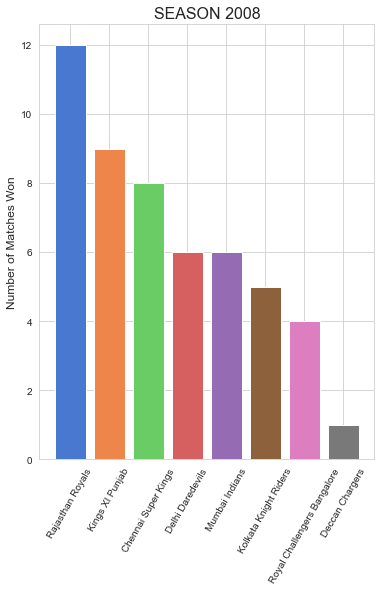

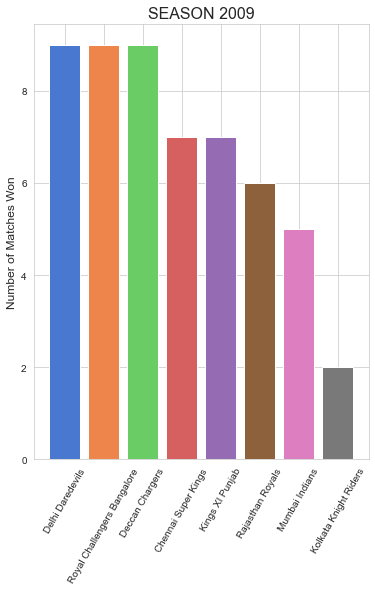

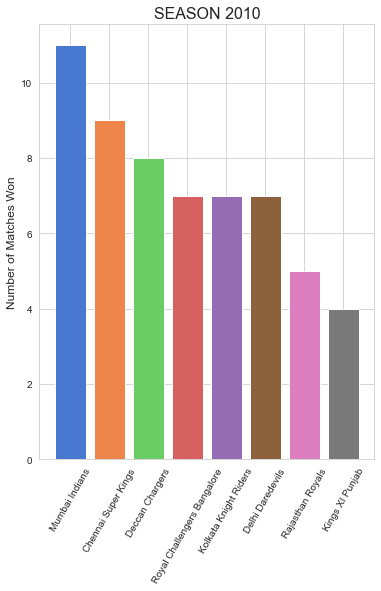

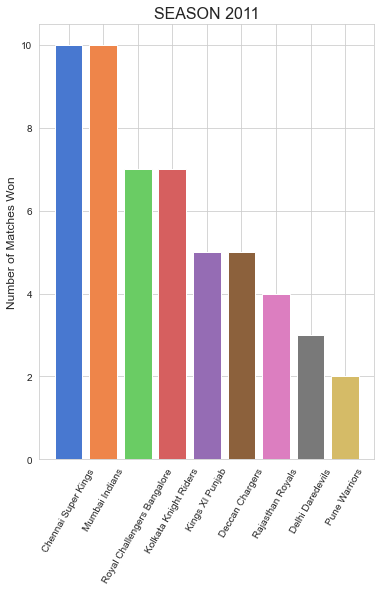

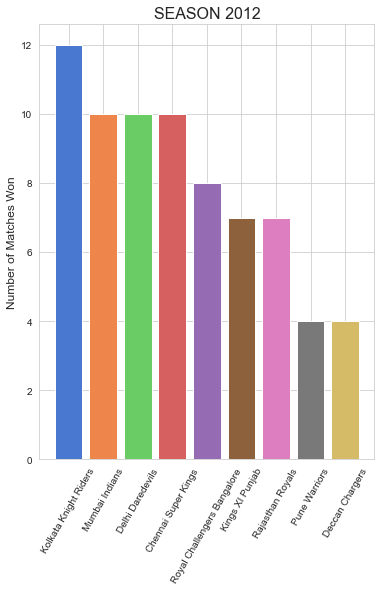

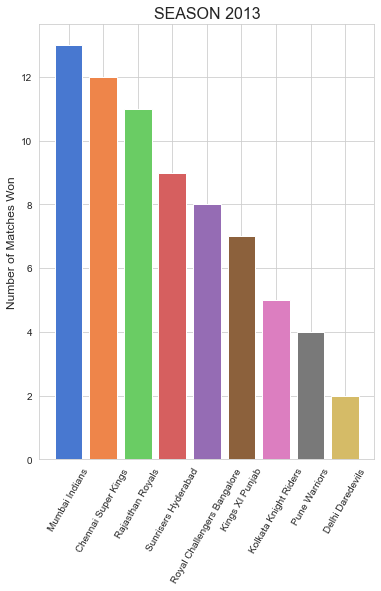

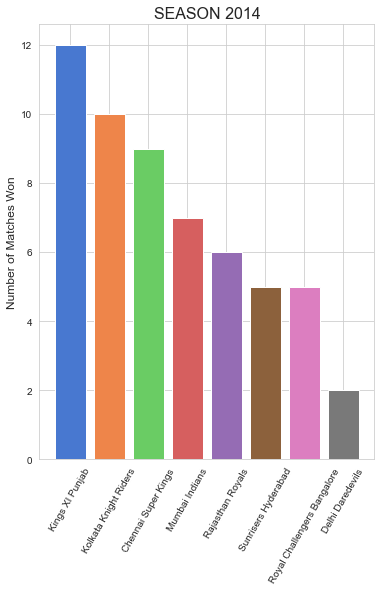

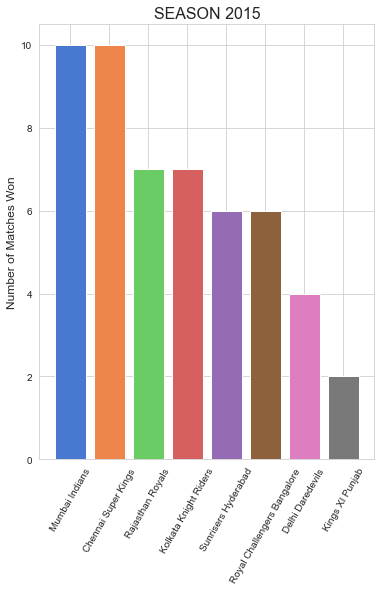

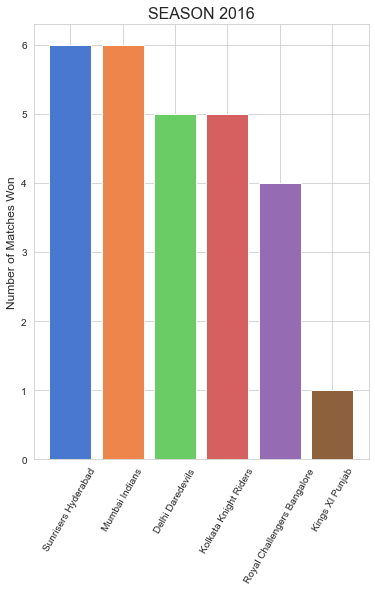

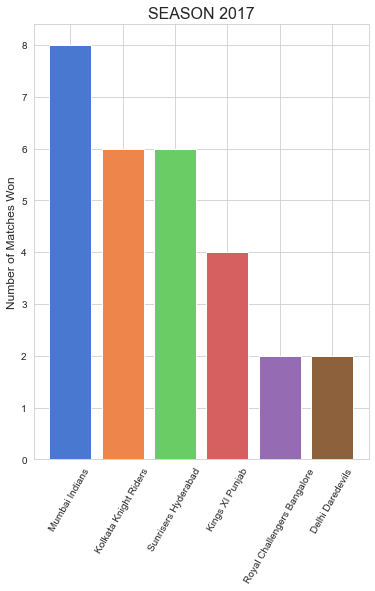

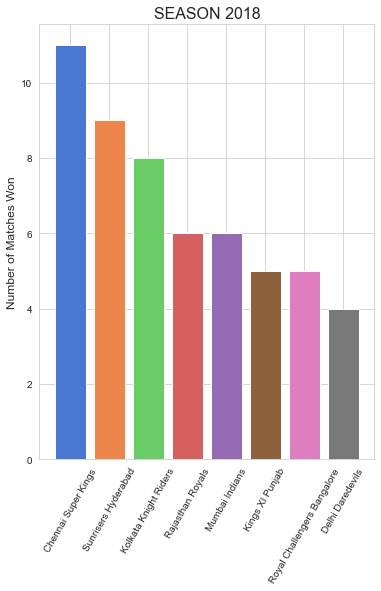

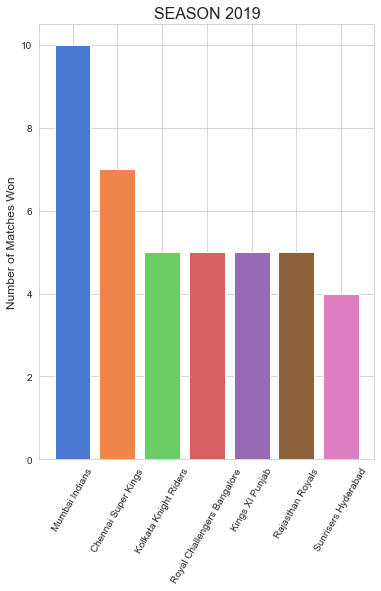

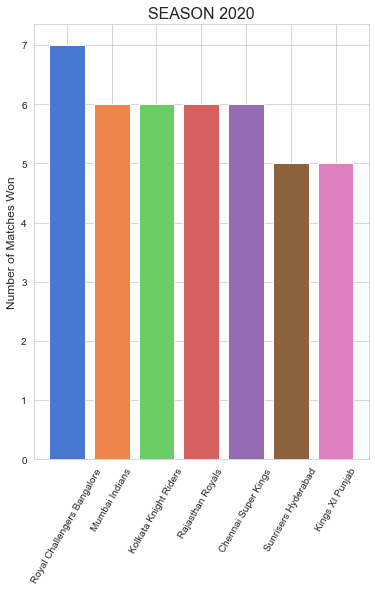

In [263]:
# Let's figure out the largest number of winners for each season
seasons = sorted(list(set(merged_data['date'].dt.year)))
for i in range(len(seasons)):
    sel_data = merged_data[merged_data['date'].dt.year == seasons[i]]
    most_wins = sel_data['winner'].value_counts()//240
    most_wins = pd.DataFrame(most_wins)

    fig = plt.subplots(figsize=(6,8))
    plt.bar(most_wins.index, most_wins.winner, color=sns.color_palette('muted'))
    plt.ylabel("Number of Matches Won",fontsize = 12)
    plt.xticks(most_wins.index, rotation=60)
    plt.title("SEASON %d" %seasons[i],{"fontsize":16})

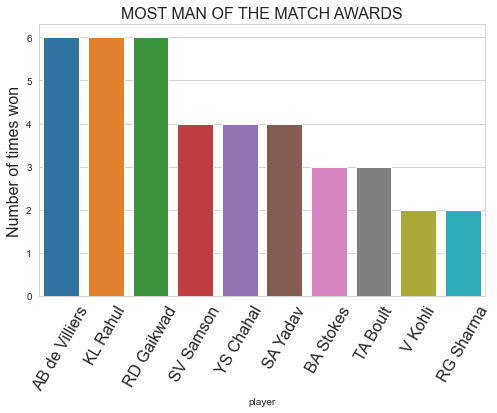

In [274]:
# Let's figure out most man of the match award

most_mom = sel_data['player_of_match'].value_counts()//120
most_mom = most_mom.reset_index()
most_mom = most_mom.rename(columns={"index":"player","player_of_match":"num of time won"})
most_mom = most_mom[:10]

plt.figure(figsize=(8,5))
sns.barplot(x = most_mom.player, y = most_mom["num of time won"])
plt.ylabel("Number of times won",fontsize = 16)
plt.xticks(fontsize = 16,rotation = 60)
plt.title("MOST MAN OF THE MATCH AWARDS",{"fontsize":16});


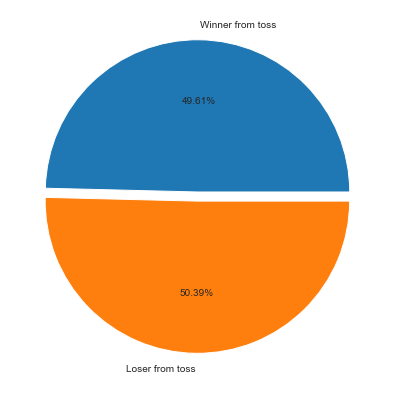

In [278]:
# Let's check if we can find any insights from the toss data
toss_factor = merged_data['toss_winner'] == merged_data['winner']
toss_factor = toss_factor.value_counts()//120
toss_data = {"Winner from toss": toss_factor[0],
            "Loser from toss": toss_factor[1]}
toss_luck = pd.Series(toss_data)

plt.figure(figsize=(7,7))
plt.pie(x=toss_luck,autopct="%.2f%%",explode=[0.03]*2,labels=toss_luck.index);

In [280]:
# Now, we can eliminate some more categorical variables
remove_cols = ['player_of_match', 'toss_winner', 'toss_decision', 'eliminator', 'batsman', 'non_striker', 'bowler']
final_data = merged_data.drop(labels=remove_cols, axis=1)
find_datatype(final_data)


 The number of categorical features:  7

 The number of integral features:  9

 The number of datetime features:  1

 The categorical features:  ['venue', 'team1', 'team2', 'winner', 'result', 'batting_team', 'bowling_team']


In [283]:
final_data.drop(labels='result', axis=1)
final_data

,date,venue,neutral_venue,team1,team2,winner,result,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
0,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,1,6,5,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,1,6,6,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,1,7,1,0,0,0,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,1,7,2,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008-04-18,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,1,7,3,1,0,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192978,2020-11-06,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,2,13,4,0,0,0,0,0,Sunrisers Hyderabad,Royal Challengers Bangalore
192979,2020-11-06,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,2,13,5,6,0,6,0,0,Sunrisers Hyderabad,Royal Challengers Bangalore
192980,2020-11-06,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,2,13,6,2,0,2,0,0,Sunrisers Hyderabad,Royal Challengers Bangalore
192981,2020-11-06,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,wickets,2,14,1,1,0,1,0,0,Sunrisers Hyderabad,Royal Challengers Bangalore


In [284]:
# Converting categorical features using OneHot Encoding
ec_data = pd.get_dummies(data=final_data, columns=['venue', 'team1', 'team2', 'winner', 'batting_team', 'bowling_team'])
ec_data.head()

,date,neutral_venue,result,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,...,bowling_team_Chennai Super Kings,bowling_team_Deccan Chargers,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,2008-04-18,0,runs,1,6,5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2008-04-18,0,runs,1,6,6,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2008-04-18,0,runs,1,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2008-04-18,0,runs,1,7,2,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,2008-04-18,0,runs,1,7,3,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [286]:
ec_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168724 entries, 0 to 192982
Data columns (total 94 columns):
 #   Column                                                      Non-Null Count   Dtype         
---  ------                                                      --------------   -----         
 0   date                                                        168724 non-null  datetime64[ns]
 1   neutral_venue                                               168724 non-null  int64         
 2   result                                                      168724 non-null  object        
 3   inning                                                      168724 non-null  int64         
 4   over                                                        168724 non-null  int64         
 5   ball                                                        168724 non-null  int64         
 6   batsman_runs                                                168724 non-null  int64         
 7   extra_runs 

In [287]:
# Splitting the dataset into test and train data
# We shall use all the data available till 2017 and try to predict the results from 2018 onwards
x_train = ec_data.drop(labels='total_runs', axis=1)[ec_data['date'].dt.year <= 2017]
x_test = ec_data.drop(labels='total_runs', axis=1)[ec_data['date'].dt.year >= 2018]
print("Training Data: ", x_train.shape)
print("Test Data: ", x_test.shape)

Training Data:  (133706, 93)
Test Data:  (35018, 93)


In [288]:
# Separating the labels which are the match scores
y_train = ec_data[ec_data['date'].dt.year <= 2016]['total_runs'].values
y_test = ec_data[ec_data['date'].dt.year >= 2017]['total_runs'].values

In [289]:
# Now there is no more use of the date colummn so we will drop it
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)
x_train.head()

,neutral_venue,result,inning,over,ball,batsman_runs,extra_runs,non_boundary,is_wicket,venue_Barabati Stadium,...,bowling_team_Chennai Super Kings,bowling_team_Deccan Chargers,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Pune Warriors,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
0,0,runs,1,6,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,runs,1,6,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,runs,1,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,runs,1,7,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,runs,1,7,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Modelling

### Linear Regression

In [290]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'runs'

In [ ]:
# creating a pickle file for classifier
filename = './models/ipl_first_innings_lr_model.pkl'
pickle.dump(lin_regressor, open(filename, 'wb'))

In [ ]:
# Predictions
predict_lin = lin_regressor.predict(x_test)

In [ ]:
# Plot the predictions errors
sns.distplot(y_test - predict_lin)

In [ ]:
# Display the MAE, MSE and RMSE

print("MAE: ", metrics.mean_absolute_error(y_test, predict_lin))
print("MSE: ", metrics.mean_squared_error(y_test, predict_lin))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, predict_lin)))

### Ridge Regression

In [291]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge()
# learning rate scheduler
params = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40]}

ridge_regressor = GridSearchCV(ridge, params, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [133706, 126507]

In [ ]:
# saving model as a pickle file
filename = './models/ipl_first_innings_ridge_model.pkl'
pickle.dump(ridge_regressor, open(filename, 'wb'))

In [ ]:
# get the best features
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_score_)

In [ ]:
# Predictions
predict_ridge = ridge_regressor.predict(x_test)

In [ ]:
# Plot the predictions errors
sns.displot(y_test - predict_ridge)

#### Metrics

In [ ]:
# Display the MAE, MSE and RMSE

print("MAE: ", metrics.mean_absolute_error(y_test, predict_ridge))
print("MSE: ", metrics.mean_squared_error(y_test, predict_ridge))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, predict_ridge)))

### Lasso Regression

In [ ]:
# Ridge Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
lasso = Lasso()
# learning rate scheduler
params = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40]}

lasso_regressor = RandomizedSearchCV(lasso, params, scoring="neg_mean_squared_error", cv=5)
lasso_regressor.fit(x_train, y_train)

In [ ]:
# saving model as a pickle file
filename = './models/ipl_first_innings_lasso_model.pkl'
pickle.dump(lasso_regressor, open(filename, 'wb'))

In [ ]:
# get the best features
print(lasso_regressor.best_estimator_)
print(lasso_regressor.best_score_)
predict_lasso = lasso_regressor.predict(x_test)

In [ ]:
# Plot the predictions errors
sns.displot(y_test - predict_lasso)

In [ ]:
# Display the MAE, MSE and RMSE

print("MAE: ", metrics.mean_absolute_error(y_test, predict_lasso))
print("MSE: ", metrics.mean_squared_error(y_test, predict_lasso))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, predict_lasso)))